## BAYENV - subsampling - more complex that I thought!

### The sub-samples need to have
- varying numbers of bottlenecked and non-bottlenecked pops in them
- the same number of sub-samples for each number of bottlenecked pops, i.e. 10 with 1, 10 with 2, not a normal distribution
- no two subsamples can be the same
- They must span as much of the temperature gradient as possible
- They must contain as many snps as possible



['/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/BAYENV_CLOUD_COMP'] 



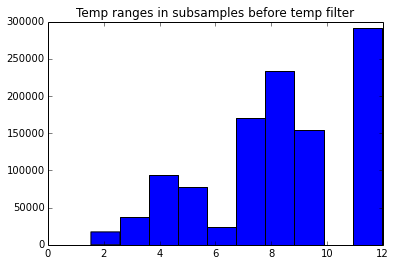

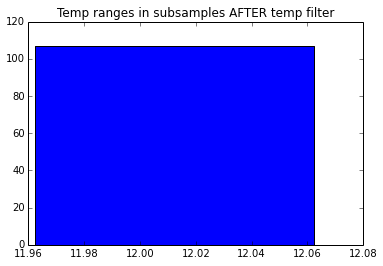

0 1
1 14
2 15
3 15
4 15
5 15
6 14
7 6
8 0
9 0
10 0


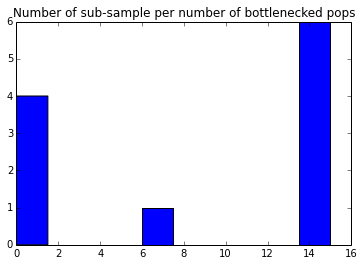

In [94]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
from collections import Counter


root = !pwd
print root, "\n"

def random_maker(number_of_lists):
    
    ## First, make a list of 7 random from 0-18 (1-19 in non python terms).

    number_of_bottled = []
    random_dict = {}
    for the_list in range(1,(number_of_lists+1),1):
        random_dict[the_list] = []
  
    ## Make the dictionary
        for i in range (100): ## iterate process 100 times to ensure I'm going to fill the list with uniq values. 
            if len(random_dict[the_list]) < 9: ## Number of pops per subsample
                new_rand = (random.randrange(0,17,1)) ## remember I have 17 pops, and indexing starts from 0, so the 17th pop will have index 16.
                if new_rand not in random_dict[the_list]:
                    random_dict[the_list].append(new_rand)

    ## Make sure I have an even number of sub-samples containing different numbers of bottlenecked popualtions.
    
    ### Get population temp file ###  Contatins only the 17 populations used in this study!
    pop_temps = open("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/BAYENV_CLOUD_COMP/Climate_data/2.5_arc_minutes/pop_mean_temps_Celcius_Bayenv_only.tsv", 'r').readlines()
    
    temp_ranges = []
    post_filter_temp_ranges = []
    even_dict = {}
    
    for number in range(0,11,1): # i.e. the range of bottlenecked pop bins (0-11 bottlenecked pops per subsample)
        even_dict[number] = []
        for key, values in random_dict.items(): ## for each random subsample from above
            index_counter = 0
            temps = []
            
            for index in values: ## for every population index in the subsample
                if index < 8: ## Count the number of pops in that subsample ranked higher than 8 as most bottlnecked populations.
                    index_counter +=1
                temps.append(float(pop_temps[index].split()[1].strip())) ## add that populations temp data to the temp range list for this subsample
            
            temp_range = max(temps) - min(temps) ## get range of temps in subsample
            temp_ranges.append(temp_range) ## add temp range to list of temp ranges for all subsamples
            
            Temp_range_minimum = 9 ## Set the minimum temp range for sub-samples
            Number_of_subsamples_per_bottleneck_class = 15 ## Set the number of sub-samples per number of bottlenecked-pops-class here
                
            if index_counter == number and temp_range > Temp_range_minimum and len(even_dict[number]) < Number_of_subsamples_per_bottleneck_class: ## If that count = the number of bottlenecked pops required for the current iteration
                post_filter_temp_ranges.append(temp_range)
                even_dict[number].append(values)
    
    ## Make a quick hist of the temprange in each class before filtering
    
    plt.hist(temp_ranges)
    plt.title("Temp ranges in subsamples before temp filter")
    plt.axes()
    plt.show()
    
    ## And one of the temprange in each class after filtering
    
    plt.hist(post_filter_temp_ranges)
    plt.title("Temp ranges in subsamples AFTER temp filter")
    plt.axes()
    plt.show()
    
    
    hist_data = []
    for key, values in even_dict.items():
        for i in range(len(values)):  ## Here I am sorting - otherwise the setting below wont work
            values[i] = sorted(values[i])

        even_dict[key] = [list(t) for t in set(map(tuple, even_dict[key]))] ## Set the list of lists, in order to make sure that I am not doing the same population combo more than once!
        ## Note that this will remove some datasets, so should set the number of sub-samples for each bin higher than I need
        print key, len(even_dict[key])
        hist_data.append(len(even_dict[key]))
        

    #print even_dict
    
    ## Make a quick hist of the number of uniq sub-samples in each class
    plt.hist(hist_data)
    plt.title("Number of sub-sample per number of bottlenecked pops")
    plt.axes()
    plt.show()

    return even_dict


sub_samples= random_maker(100000)


## Next, convert to real population names and make pop_codes file

In [95]:
import os

populations = ["TROM", "CAKE", "BF", "MOAT", "STEC", "CA-LK","OBY","PED","SD","STYV","SK","OU","WEN","COP","POLEN","PRO","TU",]
popslists = []

new_dict = {}

## replace numbers with pop_names ## 

for key, values in sub_samples.items():
    
    if len(sub_samples[key]) >0:
        new_dict[key] = []
        #os.mkdir("./Sub-samples/"+str(key)+"_bottlenecked_pops")
        for subsample in sub_samples[key]:
            pop_names = []
            for i in subsample:
                pop_names.append(populations[i])
            if len(new_dict[key]) < 8:
                new_dict[key].append(pop_names)
        print key, len(new_dict[key])

        
### Make directories and pop_codes files ###

pop_codes_master = open("pop_codes_master.txt", 'r').readlines()

for key, values in new_dict.items():
    os.mkdir("./Sub-samples/"+str(key)+"_bottlenecked_pops")
    for rep in range(0, len(values), 1):
        os.mkdir("./Sub-samples/"+str(key)+"_bottlenecked_pops/rep_"+str(rep))
        pop_codes = open("./Sub-samples/"+str(key)+"_bottlenecked_pops/rep_"+str(rep)+"/pop_codes.txt", 'w')
        for pop in values[rep]:
            for code in pop_codes_master:
                if pop in code:
                    pop_codes.write(code)
        pop_codes.close()

0 1
1 8
2 8
3 8
4 8
5 8
6 8
7 6


## STACKS-Populations was run at this point

###Now making some summary graphs for the subsamples

    - These graphs were visualised for paper in R script "BAYENV Sub-sample summary stats.R"

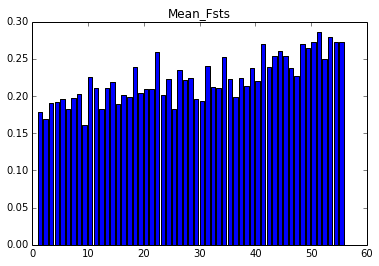

In [116]:
import os
import numpy as np

##### Fsts ####

Newfile = open("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/BAYENV_CLOUD_COMP/Sub-samples/Sub_sample_fsts.txt", 'w')
bar_data = []
bar_names = []
bar_number= []
bar_n = 0
for root, dirs, files in os.walk("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/BAYENV_CLOUD_COMP/Sub-samples"):
    for fil in files:
        if "fst_summary" in fil:
            bar_n +=1
            #print root, fil
            fst_fil = open(root+"/"+fil, 'r').readlines()
            fsts = []
            for line in fst_fil[1:]:
                for cell in line.split()[1:]:
                    fsts.append(float(cell))
            Newfile.write('/'.join(root.split("/")[-2:])+"\t"+str(np.mean(fsts))+"\n")
            bar_names.append('_'.join(root.split("/")[-2:]))
            bar_data.append(np.mean(fsts))

plt.bar(range(1,56,1), bar_data)
plt.title("Mean_Fsts")
plt.axes()
plt.show()
Newfile.close()

### Have to make BAYENV temps files before this stage ####

temp_range_file = open("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/BAYENV_CLOUD_COMP/Sub-samples/Sub_samp_temp_ranges.txt", 'w')

for root, dirs, files in os.walk("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/BAYENV_CLOUD_COMP/Sub-samples"):
    for fil in files:
        if fil == "temps.env":
            temp_fil = open(root+"/"+fil, 'r').readlines()[0].split()
            temp_fil_ints = map(float, temp_fil)
            temp_range_file.write('/'.join(root.split("/")[-2:])+"\t"+str(max(temp_fil_ints) - min(temp_fil_ints))+"\n")
        
temp_range_file.close()   

In [133]:
import numpy as np

## Bottleneck stats files ##
bottle_stats = open("./Sub-samples/All_bottleneck_stats.tsv", 'r').readlines()

RAD_ho_means = []
Micro_Ho_means = []
Micro_Ar_means = []
GW_means = []

subsample_mean_bottle_stats = open("./Sub-samples/Mean_bottleneck_stats_per_subsample", 'w')
subsample_mean_bottle_stats.write(bottle_stats[0])


for root, dirs, files in os.walk("/media/dan/34D5D1CE642D7E36/2013076_Hanfling_Bernd/BAYENV_CLOUD_COMP/Sub-samples"):
    for fil in files:
        if "uniq_pops" in fil:
            
            RAD_ho = []
            Micro_Ho = []
            Micro_Ar = []
            GW = []
            
            bottle_sub_file = open(root+"/Bottleneck_stats.tsv", 'w')
            pops_file = open(root+"/"+fil).readlines()
            bottle_sub_file.write(bottle_stats[0])
            for pop in pops_file:
                for stats in bottle_stats:
                    if pop.strip() in stats:
                        RAD_ho.append(float(stats.strip().split()[1]))
                        Micro_Ho.append(float(stats.strip().split()[2]))
                        Micro_Ar.append(float(stats.strip().split()[3]))
                        GW.append(float(stats.strip().split()[4]))                       
                        
                        bottle_sub_file.write(stats)
            RAD_ho_means = np.mean(RAD_ho)
            Micro_Ho_means = np.mean(Micro_Ho)
            Micro_Ar_means = np.mean(Micro_Ar)
            GW_means = np.mean(GW)
            
            subsample_mean_bottle_stats.write(str("/".join(root.split("/")[-2:]))+"\t"+str(RAD_ho_means)+"\t"+str(Micro_Ho_means)+"\t"+str(Micro_Ar_means)+"\t"+str(GW_means)+"\n")
            
            bottle_sub_file.close()
subsample_mean_bottle_stats.close()

### Need to do number of SNPs here too